# Evaluación del modelo de aprendizaje no supervisado

## Silhouette Score (puntuación de silueta)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import Line2D
from sklearn.metrics import silhouette_score

In [8]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
X = StandardScaler().fit_transform(X)

In [9]:
single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
kmeans = cluster.KMeans(n_clusters=2)
single.fit(X)
y1_pred = single.labels_.astype(np.int)
kmeans.fit(X)
y2_pred = kmeans.predict(X)

Model 1 Silhouette Score: 0.3923484678606727
Model 2 Silhouette Score: 0.4968751356395122


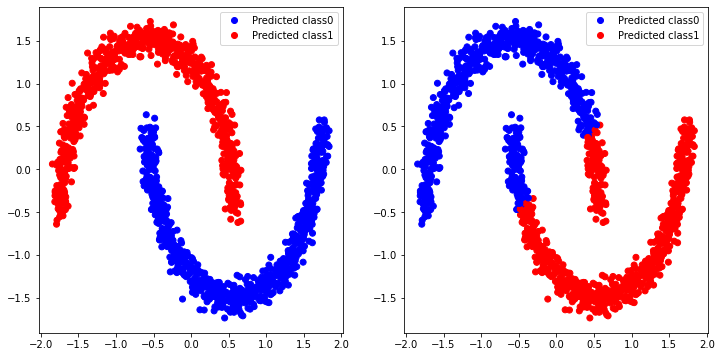

In [21]:
fit, ax = plt.subplots(1, 2, figsize=(12,6))
colors = np.array(['blue','red'])
legend_elems = [Line2D([0], [0], color=color, marker='o', linestyle='', 
                       label='Predicted class{}'.format(i)) for i, color in enumerate(colors)]

ax[0].scatter(X[:,0], X[:,1], color=colors[y1_pred])
ax[0].legend(handles=legend_elems, loc='upper right')
ax[1].scatter(X[:,0], X[:,1], color=colors[y2_pred])
ax[1].legend(handles=legend_elems, loc='upper right')

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))


## KElbowVisualizer (Metodo del codo)

In [28]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

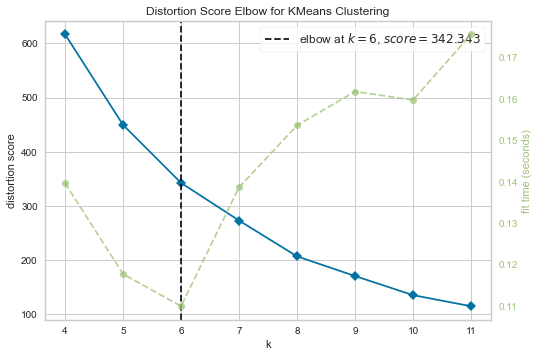

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4, 12))
visualizer.fit(X)
visualizer.poof()

# Visualización de Clusters

In [31]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [33]:
X, _ = make_blobs(n_samples=1500, centers=4, cluster_std=1.5)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

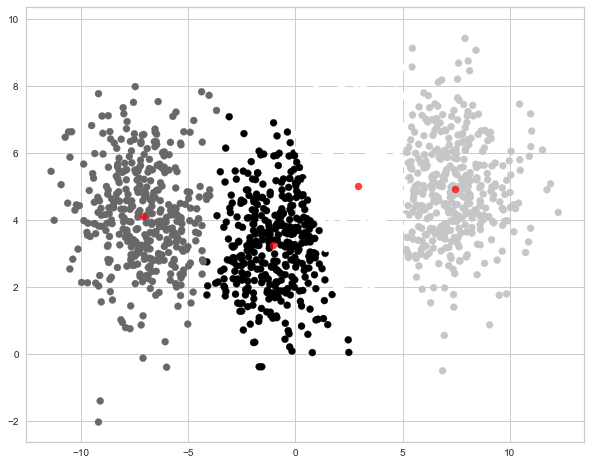

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)
plt.show()

# PCA

In [41]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

X, _ = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)
X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

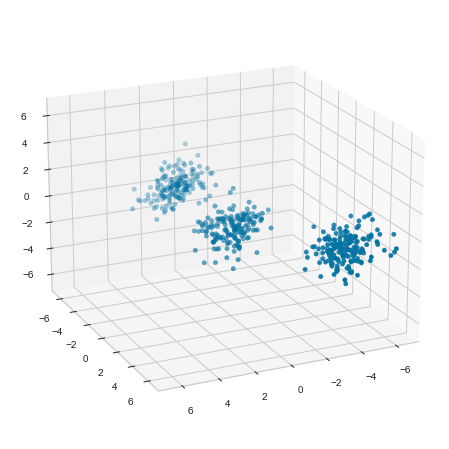

In [45]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=20, azim=65)
plt.show()

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

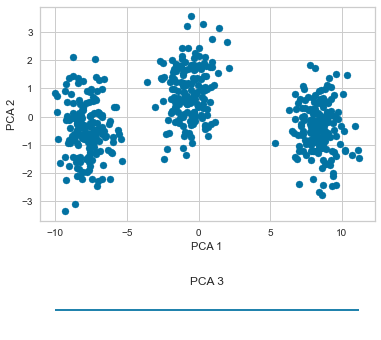

In [53]:
fig = plt.figure(figsize=(6,6))
ax = [plt.subplot2grid((6,1), (0,0), rowspan=4), plt.subplot2grid((6,1), (5,0))]
ax[0].scatter(pca_X[:,0], pca_X[:,1])
ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')
plt.show()


## Parcelas T-SNE

In [54]:
from sklearn.manifold import TSNE

In [55]:
X, y = datasets.load_iris(return_X_y=True)

In [59]:
fig, ax = plt.subplots(1, 4, figsize=(15,7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:,1], c=y)
    ax[i].set_title('Perplexity {}'.format(perp))

plt.show()